In [1]:
#1.1匯入必要的函式庫 (Library)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier



Matplotlib is building the font cache; this may take a moment.


In [2]:
#1.2從 UCI Repository 下載 Adult 資料集
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# 使用 ucimlrepo 套件來下載
adult = fetch_ucirepo(id=2)
print("資料集下載成功！")
# 將資料轉換為 pandas dataframes
x = adult.data.features
y = adult.data.targets

#查看一下資料集筆數(共幾筆，幾個欄位)
print(f"特徵比數 (x) 維度: {x.shape}")
print(f"目標 (y) 維度: {y.shape}")

資料集下載成功！
特徵比數 (x) 維度: (48842, 14)
目標 (y) 維度: (48842, 1)


In [3]:
# 查看資料集的前 50 筆資料
display(x.head(50))
display(y.head(50))

# 找出所有物件/文字類型的欄位
categorical_cols = x.select_dtypes(include=['object']).columns

print("檢查所有類別欄位的獨特值")
# 遍歷每一個類別欄位
for col in categorical_cols:
    # 取得該欄位所有獨一無二的值
    unique_values = x[col].unique()
    print(f"\n欄位 '{col}':")
    print(unique_values) #觀察到除了"? 其他都是有意義的值

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States


,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
5,<=50K
6,<=50K
7,>50K
8,>50K
9,>50K


檢查所有類別欄位的獨特值

欄位 'workclass':
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

欄位 'education':
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

欄位 'marital-status':
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

欄位 'occupation':
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]

欄位 'relationship':
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

欄位 'race':
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

欄位 'sex':
['Male' 'Female']

欄位 'native-country':
['United-States' 'Cuba' 'Jamaic

In [4]:
#2.1資料預處理(處理缺失值 用眾數填補因為Adult資料集欄位大多數都是類別，無法計算平均值或中位數)
import numpy as np

print("開始處理缺失值")
# 尋找所有值為 '?' 的儲存格，並將它們全部替換成 np.nan(NumPy用來表示"標準缺失值"的方法)
x = x.replace('?', np.nan)

for column in x.columns:
  if x[column].isnull().any(): #x[column]14個欄位 isnull()檢查其中是否包含缺失值有就True .any()檢查至少有一個True
    x[column] = x[column].fillna(x[column].mode()[0]) #x[column].mode()[0]計算這個欄位的眾數 眾數可能不只一個 取第一個就夠了
print("缺失值處理完畢")
# 查看補上缺失值後資料集的前 50 筆資料
display(x.head(50))
display(y.head(50))

開始處理缺失值
缺失值處理完畢


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States


,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
5,<=50K
6,<=50K
7,>50K
8,>50K
9,>50K


In [5]:
#2.2 處理目標變數 (y)

# 檢查一下 y 的內容
print("處理前的 y 內容：")
print(y['income'].value_counts())
#可以發現欄位的資料 會有"." 例如"<=50K. >50. 要去掉句號"
y['income'] = y['income'].str.replace('.', '', regex=False)#(你要找的目標字元,要取代的內容,regex=false告訴replace把目標字元當成普通的文字，而不是正則表達式)

# 初始化一個 scikit-learn 的 LabelEncoder 物件
le = LabelEncoder()

#fit會先找出y的欄位資料，看有幾種不重複的文字標籤 把文字對應到數字 例如"<=50 => 0" "<50 => 1"
y_encoded = le.fit_transform(y['income'])

# 顯示轉換後的結果，確認一下
print("\n處理後的 y 內容 (前 10 筆):")
print(y_encoded[:10])

# 看看LabelEncoder 是如何對應的 (0 代表哪個標籤, 1 代表哪個標籤)
print("\n標籤對應關係:", list(le.classes_))


處理前的 y 內容：
income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

處理後的 y 內容 (前 10 筆):
[0 0 0 0 0 0 0 1 1 1]

標籤對應關係: ['<=50K', '>50K']


/var/folders/bf/8nk0pn616n720q_wbcy_593h0000gn/T/ipykernel_24425/3983026737.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'] = y['income'].str.replace('.', '', regex=False)#(你要找的目標字元,要取代的內容,regex=false告訴replace把目標字元當成普通的文字，而不是正則表達式)


In [6]:
#2.3 處理特徵(x)

#對於類別資料不使用上面y的方法 可能會讓模型認為有大小或順序 採用One-Hot Encoding

#首先要找出x欄位中那些是文字 哪些是數字 文字就要轉換
categorical_features = x.select_dtypes(include=['object']).columns
numerical_features = x.select_dtypes(include=['int64', 'float64']).columns

print(f"找到的類別欄位: {list(categorical_features)}")
print(f"找到的數值欄位: {list(numerical_features)}")

#ColumnTransformer 可以將多個不同的轉換器應用到一個資料集的不同欄位上 例如文字就用One-Hot Encoding 數字就passthrough(保持不變)
preprocessor = ColumnTransformer(
    transformers=[#(tuple的名稱,轉換器物件名稱，回傳標準NumPy陣列) handle_unknown='ignore'防止未來測試資料上出現未見過的類別(都歸類在0)
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
    #到這邊都還只是有一個分類藍圖 例如sex 有Male、Female兩個不重複的值 他會先記住到時候要變成sex_Female sex_Male兩個欄位
)
# 使用 .fit_transform() 來學習並轉換 x
# 在這邊開始轉換成0、1
x_processed = preprocessor.fit_transform(x)


print(f"\n轉換前的 x 維度: {x.shape}")
print(f"經過 One-Hot Encoding 處理後的 x 維度: {x_processed.shape}")
print("\n查看處理後資料的前10筆 (部分欄位):")
#只看前5筆
x_processed_df = pd.DataFrame(x_processed, columns=preprocessor.get_feature_names_out())
display(x_processed_df.head(10))
#可以發現從14筆欄位擴展到105筆



找到的類別欄位: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
找到的數值欄位: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

轉換前的 x 維度: (48842, 14)
經過 One-Hot Encoding 處理後的 x 維度: (48842, 105)

查看處理後資料的前10筆 (部分欄位):


,cat__workclass_Federal-gov,cat__workclass_Local-gov,cat__workclass_Never-worked,cat__workclass_Private,cat__workclass_Self-emp-inc,cat__workclass_Self-emp-not-inc,cat__workclass_State-gov,cat__workclass_Without-pay,cat__education_10th,cat__education_11th,...,cat__native-country_Trinadad&Tobago,cat__native-country_United-States,cat__native-country_Vietnam,cat__native-country_Yugoslavia,remainder__age,remainder__fnlwgt,remainder__education-num,remainder__capital-gain,remainder__capital-loss,remainder__hours-per-week
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,39.0,77516.0,13.0,2174.0,0.0,40.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,50.0,83311.0,13.0,0.0,0.0,13.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,38.0,215646.0,9.0,0.0,0.0,40.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,53.0,234721.0,7.0,0.0,0.0,40.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,28.0,338409.0,13.0,0.0,0.0,40.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,37.0,284582.0,14.0,0.0,0.0,40.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,49.0,160187.0,5.0,0.0,0.0,16.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,52.0,209642.0,9.0,0.0,0.0,45.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,31.0,45781.0,14.0,14084.0,0.0,50.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,42.0,159449.0,13.0,5178.0,0.0,40.0


In [7]:
#2.4分割訓練跟測試資料
x_train, x_test, y_train, y_test = train_test_split(
    x_processed, y_encoded, test_size=0.2, random_state=42 #固定每次的分割方式
)
# 印出分割後的資料筆數，確認一下
print("資料分割完成！")
print(f"訓練資料筆數 (x_train): {x_train.shape[0]}")
print(f"測試資料筆數 (x_test): {x_test.shape[0]}")
print(f"訓練目標筆數 (y_train): {y_train.shape[0]}")
print(f"測試目標筆數 (y_test): {y_test.shape[0]}")

資料分割完成！
訓練資料筆數 (x_train): 39073
測試資料筆數 (x_test): 9769
訓練目標筆數 (y_train): 39073
測試目標筆數 (y_test): 9769


In [8]:
#3.1訓練CART模型 使用 Gini Impurity
# 1. 初始化一個 DecisionTreeClassifier 物件
#    criterion='gini' 是 CART 演算法的標準設定
#    random_state=42 確保每次執行的結果都一樣，方便比較
cart_model = DecisionTreeClassifier(criterion='gini', random_state=42)

# 2. 使用訓練資料 (x_train, y_train) 來訓練模型
cart_model.fit(x_train, y_train)
print("模型訓練完成！")

# 3. 在「訓練資料」和「測試資料」上進行預測
y_train_pred_cart = cart_model.predict(x_train)
y_test_pred_cart = cart_model.predict(x_test)
print("預測完成！")

# 4. 計算並印出正確率
train_accuracy_cart = accuracy_score(y_train, y_train_pred_cart)
test_accuracy_cart = accuracy_score(y_test, y_test_pred_cart)

print(f"\nCART (Gini) - 訓練資料正確率: {train_accuracy_cart:.4f}")
print(f"CART (Gini) - 測試資料正確率: {test_accuracy_cart:.4f}")

模型訓練完成！
預測完成！

CART (Gini) - 訓練資料正確率: 0.9999
CART (Gini) - 測試資料正確率: 0.8108


In [9]:
#訓練 ID3(使用 Entropy)

# 1. 這次設定 criterion='entropy'
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# 2. 訓練模型
id3_model.fit(x_train, y_train)
print("模型訓練完成！")

# 3. 在「訓練資料」和「測試資料」上進行預測
y_train_pred_id3 = id3_model.predict(x_train)
y_test_pred_id3 = id3_model.predict(x_test)
print("預測完成！")

# 4. 計算並印出正確率
train_accuracy_id3 = accuracy_score(y_train, y_train_pred_id3)
test_accuracy_id3 = accuracy_score(y_test, y_test_pred_id3)

print(f"\nID3/C4.5 (Entropy) - 訓練資料正確率: {train_accuracy_id3:.4f}")
print(f"ID3/C4.5 (Entropy) - 測試資料正確率: {test_accuracy_id3:.4f}")



模型訓練完成！
預測完成！

ID3/C4.5 (Entropy) - 訓練資料正確率: 0.9999
ID3/C4.5 (Entropy) - 測試資料正確率: 0.8111


In [10]:
#ChefBoost: 一個輕量級的決策樹框架，同樣可以從 PyPI 安裝

print("\n--- 正在準備並訓練 C4.5 (ChefBoost) 模型 ---")

# 3.3.1 準備 C4.5 和 C5.0 所需的原始格式資料
x_original = x.copy()
y_original = y['income'].copy()

# --- 關鍵修正！在分割前先進行 Label Encoding ---
#先對所有文字類型的欄位進行數值化，確保所有可能的類別都被學習到
print("正在對原始資料進行 Label Encoding...")
from sklearn.preprocessing import LabelEncoder

x_original_encoded = x_original.copy()
# 建立一個字典來存放每個欄位的 LabelEncoder，雖然這裡沒用到，但這是個好習慣
encoders = {}

# 遍歷所有物件類型 (文字) 的欄位
for col in x_original_encoded.select_dtypes(include=['object']).columns:
    le_col = LabelEncoder()
    # 學習並轉換該欄位
    x_original_encoded[col] = le_col.fit_transform(x_original_encoded[col])
    encoders[col] = le_col
print("Label Encoding 完成！")


# 老師說明：現在我們對「數值化之後」的資料進行分割
x_original_train, x_original_test, y_original_train, y_original_test = train_test_split(
    x_original_encoded, y_original, test_size=0.2, random_state=42
)
print("C4.5/C5.0 專屬的資料準備與分割完成。")


# 3.3.2 安裝與訓練 ChefBoost
try:
    import chefboost
except ImportError:
    print("正在安裝 ChefBoost，請稍候...")
    !pip install chefboost
    print("ChefBoost 安裝完成！")
from chefboost import Chefboost as chef

# 準備 ChefBoost 所需的 DataFrame
chef_training_df = x_original_train.copy()
chef_training_df['Decision'] = y_original_train

# 訓練模型
config = {'algorithm': 'C4.5'}
model_chefboost = chef.fit(chef_training_df.copy(), config=config)
print("ChefBoost C4.5 模型訓練完成！")

# 進行預測
print("正在進行預測...")
y_test_pred_chefboost = []
for index, instance in x_original_test.iterrows():
    prediction = chef.predict(model_chefboost, instance.tolist())
    y_test_pred_chefboost.append(prediction)
print("預測完成！")

# 評估準確率
test_accuracy_chefboost = accuracy_score(y_original_test, y_test_pred_chefboost)
print(f"C4.5 (ChefBoost) - 測試資料正確率: {test_accuracy_chefboost:.4f}")



--- 正在準備並訓練 C4.5 (ChefBoost) 模型 ---
正在對原始資料進行 Label Encoding...
Label Encoding 完成！
C4.5/C5.0 專屬的資料準備與分割完成。
正在安裝 ChefBoost，請稍候...
ChefBoost 安裝完成！
25-10-15 16:32:51 - C4.5 tree is going to be built...
25-10-15 16:32:57 - -------------------------
25-10-15 16:32:57 - finished in 5.992469072341919 seconds
25-10-15 16:32:58 - -------------------------
25-10-15 16:32:58 - Evaluate train set
25-10-15 16:32:58 - -------------------------
25-10-15 16:32:58 - Accuracy: 83.14948941724464% on 39073 instances
25-10-15 16:32:58 - Labels: ['<=50K' '>50K']
25-10-15 16:32:58 - Confusion matrix: [[28604, 5447], [1137, 3885]]
25-10-15 16:32:58 - Precision: 84.0034%, Recall: 96.177%, F1: 89.679%
ChefBoost C4.5 模型訓練完成！
正在進行預測...
預測完成！
C4.5 (ChefBoost) - 測試資料正確率: 0.8301


In [11]:
#使用C5.0演算法 Scikit-learn 中未包含
print("\n--- 正在準備並訓練 C5.0-like (scikit-learn) 模型 ---")

# 1. 初始化一個 DecisionTree 作為 C5.0 Boosting 的基礎
base_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

# 2. 使用 AdaBoostClassifier 來模擬 C5.0 的 Boosting 機制
#    n_estimators=50 代表建立 50 棵決策樹
c50_sklearn_model = AdaBoostClassifier(
    estimator=base_tree,
    n_estimators=50,
    random_state=42
)

# --- 關鍵修正！在訓練前先對 y_original_train 進行 Label Encoding ---
# 使用之前已經 fit 好的 le 對訓練目標進行轉換
y_original_train_encoded = le.transform(y_original_train)
y_original_test_encoded = le.transform(y_original_test)
print("訓練與測試目標變數已進行 Label Encoding。")


# 3. 訓練模型 (使用 Label Encoded 資料)
c50_sklearn_model.fit(x_original_train, y_original_train_encoded)
print("C5.0-like 模型訓練完成！")

# 4. 進行預測
predictions_py_c50_sklearn = c50_sklearn_model.predict(x_original_test)
print("預測完成！")

# 5. 評估準確率 (與原始的 y_test 比較)
#    注意：我們用 y_original_test_encoded 來計算準確率，因為模型輸出的是 0 和 1
test_accuracy_c50_sklearn = accuracy_score(y_original_test_encoded, predictions_py_c50_sklearn)
print(f"\n✅ C5.0-like (scikit-learn) - 測試資料正確率: {test_accuracy_c50_sklearn:.4f}")

# 顯示更詳細的報告
print("\nClassification Report (C5.0-like):")
print(classification_report(y_original_test_encoded, predictions_py_c50_sklearn, target_names=le.classes_))


--- 正在準備並訓練 C5.0-like (scikit-learn) 模型 ---
訓練與測試目標變數已進行 Label Encoding。
C5.0-like 模型訓練完成！
預測完成！

✅ C5.0-like (scikit-learn) - 測試資料正確率: 0.8581

Classification Report (C5.0-like):
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      7414
        >50K       0.75      0.61      0.68      2355

    accuracy                           0.86      9769
   macro avg       0.82      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769



In [12]:
print("\n--- 正在彙整所有模型結果 ---")

# 將 scikit-learn 模型的預測結果轉換為原始標籤 (e.g., '>50K')
# ChefBoost 預測結果已經是標籤格式，不需轉換
y_pred_cart_labels = le.inverse_transform(y_test_pred_cart)
y_pred_id3_labels = le.inverse_transform(y_test_pred_id3)
y_pred_c50_labels = le.inverse_transform(predictions_py_c50_sklearn)

# 建立包含四種模型預測結果的 DataFrame
final_results_df = pd.DataFrame({
    'Actual_Income': y_original_test.values,
    'Predicted_CART': y_pred_cart_labels,
    'Predicted_ID3_sklearn': y_pred_id3_labels,
    'Predicted_C4.5_ChefBoost': y_test_pred_chefboost, # Directly use ChefBoost predictions
    'Predicted_C5.0_sklearn': y_pred_c50_labels
})

# 輸出到 Excel
output_filename = 'all_4_models_prediction_results.xlsx'
final_results_df.to_excel(output_filename, index=False)
print(f"四種演算法的詳細預測結果已匯出至 '{output_filename}'")


# 建立包含四種演算法的績效總結表
performance_summary = {
    '演算法 (Algorithm)': [
        'CART (Gini, scikit-learn)',
        'ID3-like (Entropy, scikit-learn)',
        'C4.5 (ChefBoost)',
        'C5.0-like (AdaBoost, scikit-learn)'
    ],
    '測試資料準確率 (Test Accuracy)': [
        test_accuracy_cart,
        test_accuracy_id3,
        test_accuracy_chefboost,
        test_accuracy_c50_sklearn
    ]
}

summary_df = pd.DataFrame(performance_summary)
summary_df['測試資料準確率 (Test Accuracy)'] = summary_df['測試資料準確率 (Test Accuracy)'].apply(lambda x: f"{x:.2%}")
print("\n--- 四種決策樹模型績效總結 ---")
display(summary_df)

summary_filename = 'models_4_performance_summary.xlsx'
summary_df.to_excel(summary_filename, index=False)
print(f"績效總結已匯出至 '{summary_filename}'")


--- 正在彙整所有模型結果 ---
四種演算法的詳細預測結果已匯出至 'all_4_models_prediction_results.xlsx'

--- 四種決策樹模型績效總結 ---


,演算法 (Algorithm),測試資料準確率 (Test Accuracy)
0,"CART (Gini, scikit-learn)",81.08%
1,"ID3-like (Entropy, scikit-learn)",81.11%
2,C4.5 (ChefBoost),83.01%
3,"C5.0-like (AdaBoost, scikit-learn)",85.81%


績效總結已匯出至 'models_4_performance_summary.xlsx'


--- 開始執行長時間的訓練與剪枝分析 ---
正在為 646 個 ccp_alpha 值訓練決策樹...
所有決策樹已訓練完成。

✅ 長時間的訓練結果已儲存至 'pruning_analysis_results.pkl' 檔案中！
  現在你可以去執行下一個儲存格進行分析了。


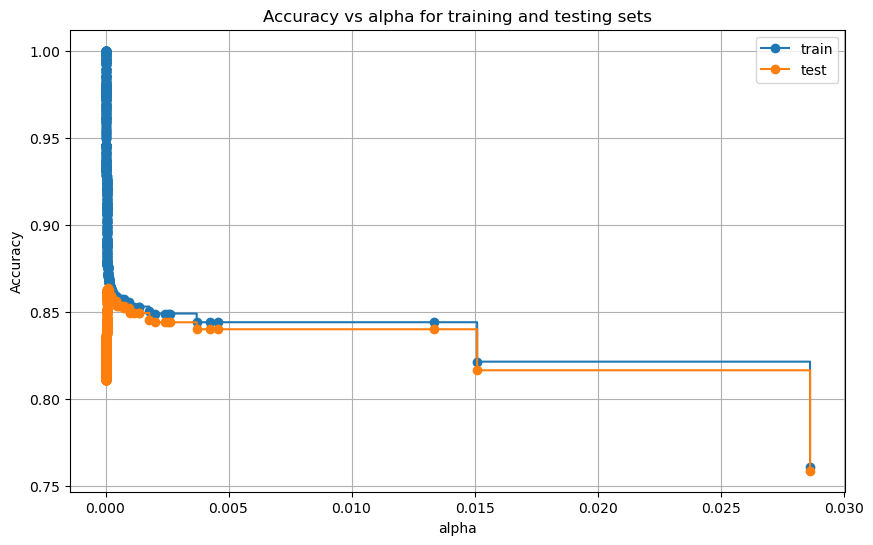


最佳測試準確率: 0.8639
對應的最佳 ccp_alpha 值: 9.539733067636356e-05


In [13]:
#將成本複雜度剪枝套用至你的作業

from sklearn.tree import plot_tree
import pickle
import matplotlib.pyplot as plt

print("--- 開始執行長時間的訓練與剪枝分析 ---")

# 使用 max_depth=15 的優化版，避免執行時間過長
base_model = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=15)
path = base_model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1] # 移除最後一個alpha

clfs = []
print(f"正在為 {len(ccp_alphas)} 個 ccp_alpha 值訓練決策樹...")
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='gini', random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

print("所有決策樹已訓練完成。")

# --- 關鍵步驟：將訓練結果儲存到檔案中 ---
results_to_save = {
    'clfs': clfs,
    'ccp_alphas': ccp_alphas,
    'x_train': x_train, 'y_train': y_train, # 一併儲存，方便後續計算
    'x_test': x_test, 'y_test': y_test
}
output_file = 'pruning_analysis_results.pkl'
with open(output_file, 'wb') as f:
    pickle.dump(results_to_save, f)

print(f"\n✅ 長時間的訓練結果已儲存至 '{output_file}' 檔案中！")
print("  現在你可以去執行下一個儲存格進行分析了。")

# 畫出關係圖 (這部分也可以移到下個儲存格，但放在這裡可以讓你立刻看到這次訓練的結果)
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

best_alpha_index = np.argmax(test_scores)
best_alpha = ccp_alphas[best_alpha_index]
best_accuracy = test_scores[best_alpha_index]

print(f"\n最佳測試準確率: {best_accuracy:.4f}")
print(f"對應的最佳 ccp_alpha 值: {best_alpha}")

變數 `le` 已成功準備。
變數 `feature_names` 已成功準備。

--- 正在產生最終三種剪枝參數的比較報告 ---

--- 參數設定 1 ---
  -> ccp_alpha: 0.000100, 深度: 21, 節點數: 265, 準確率: 0.8626
  -> 視覺化結果已儲存至 'decision_tree_alpha_1.png'


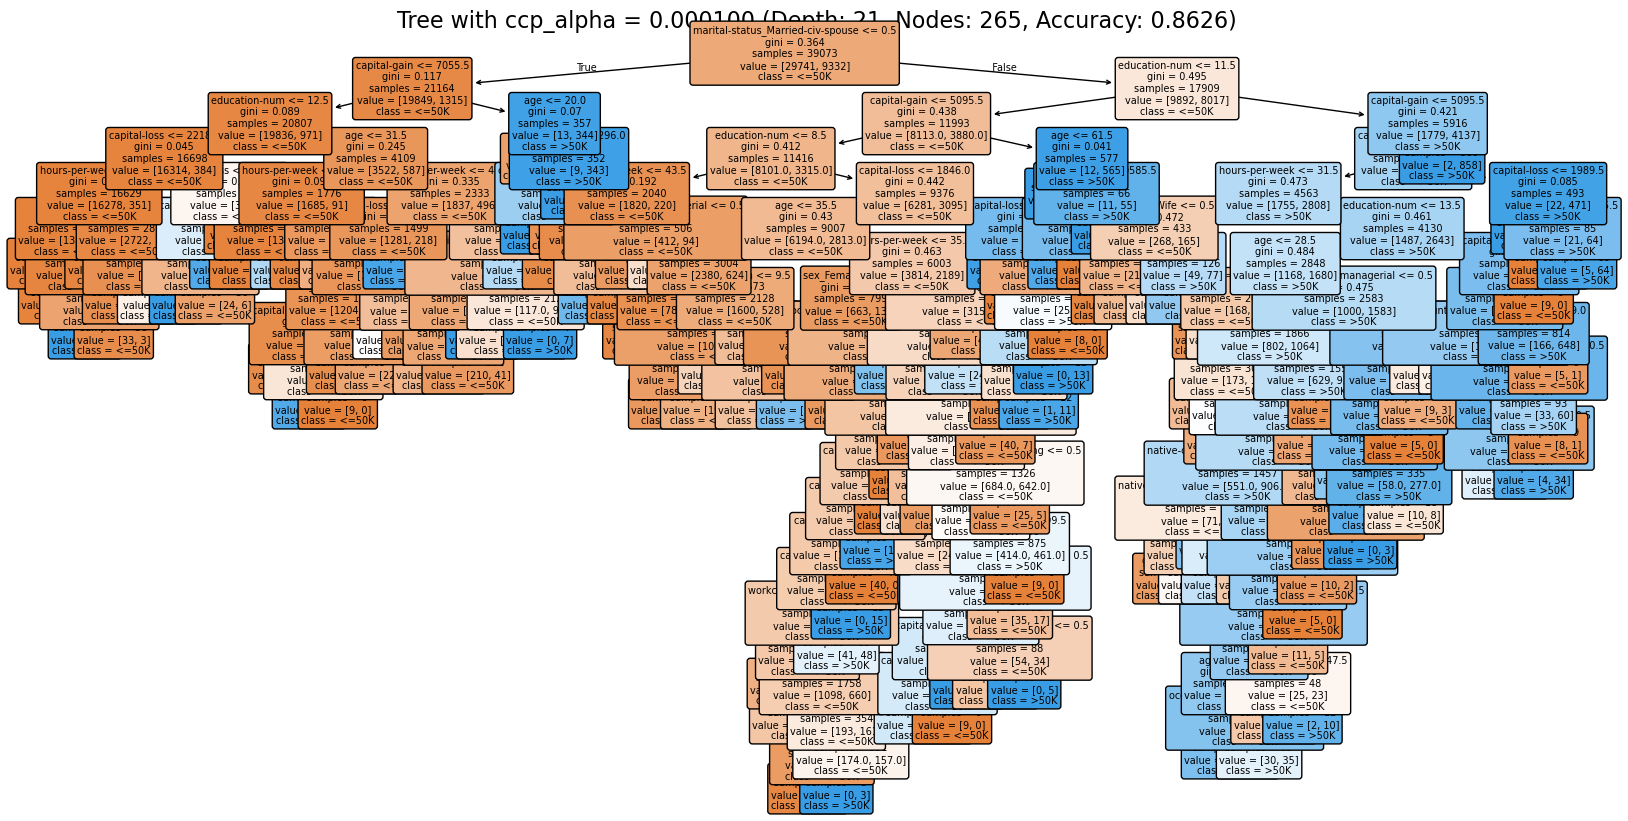


--- 參數設定 2 ---
  -> ccp_alpha: 0.000900, 深度: 9, 節點數: 37, 準確率: 0.8523
  -> 視覺化結果已儲存至 'decision_tree_alpha_2.png'


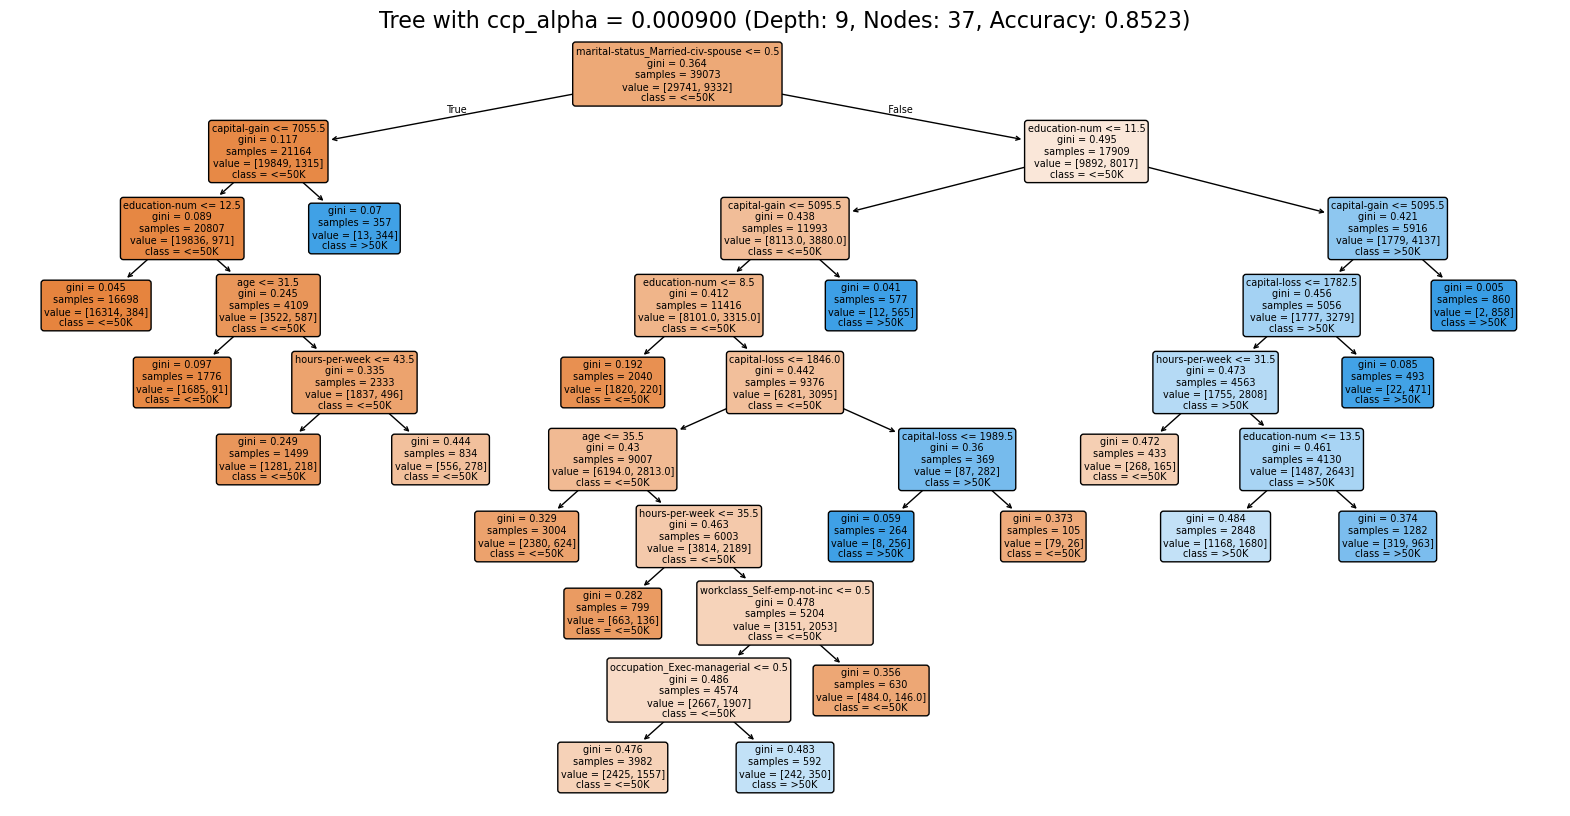


--- 參數設定 3 ---
  -> ccp_alpha: 0.004000, 深度: 4, 節點數: 13, 準確率: 0.8401
  -> 視覺化結果已儲存至 'decision_tree_alpha_3.png'


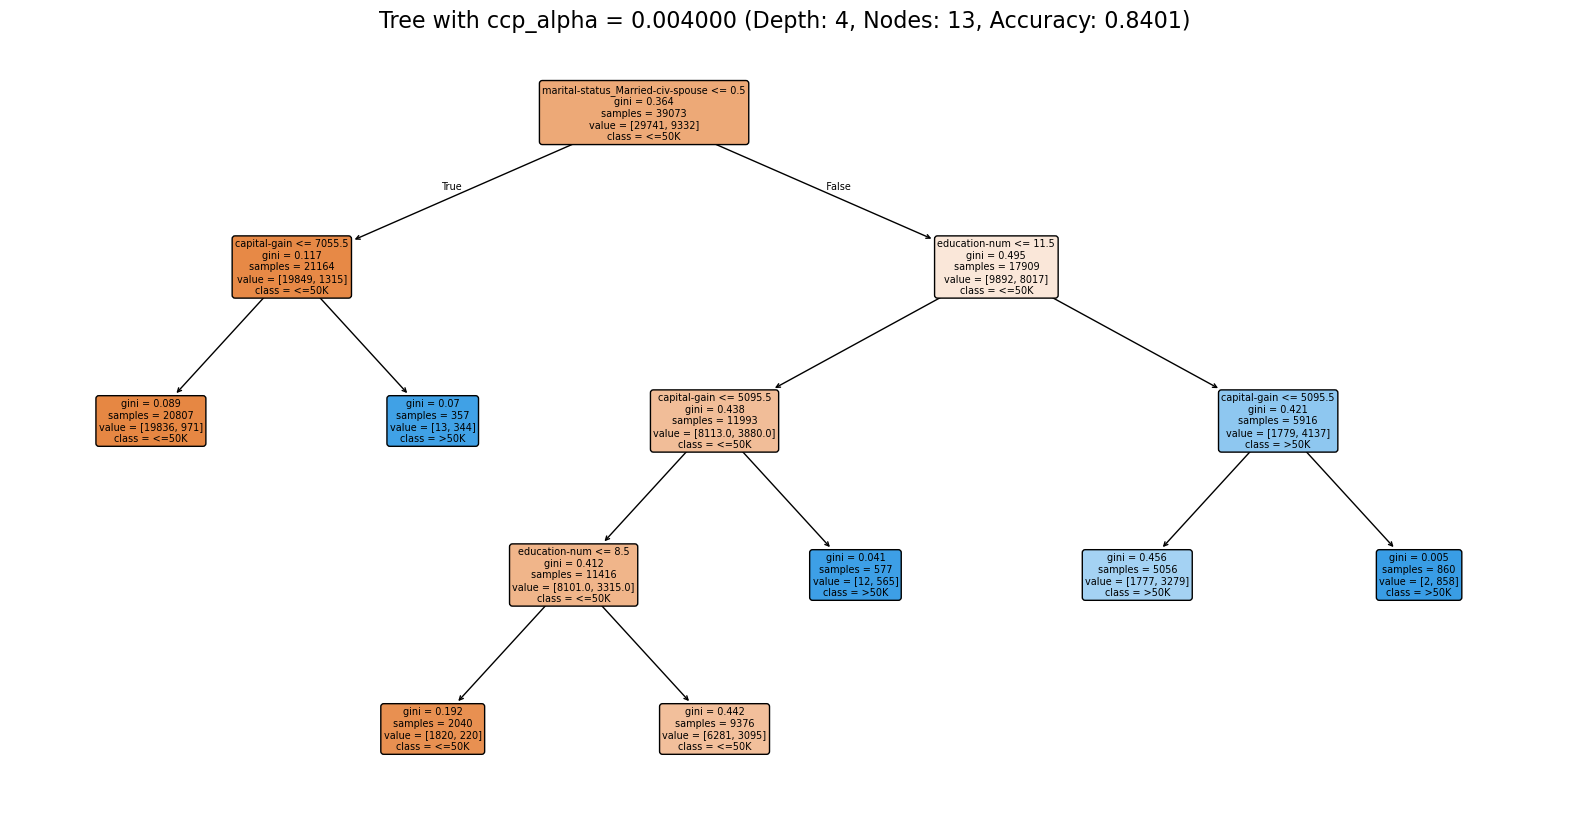



--- 剪枝參數績效總結表 ---


,ccp_alpha,Depth,Node Count,Test Accuracy
0,0.0001,21,265,0.862627
1,0.0009,9,37,0.852288
2,0.0040,4,13,0.840106


In [14]:
# --- 執行前準備：重新建立畫圖所需變數 ---
# 為了確保此儲存格能獨立運作，我們在這裡重新建立 `feature_names` 和 `le`

# 1. 重新建立 le (LabelEncoder for y)
#   (需要 adult 變數，請確保最開始讀取資料的儲存格已執行)
try:
    le_for_plot = LabelEncoder()
    # 假設 adult.data.targets 存在
    y_original_for_plot = adult.data.targets['income'].str.replace('.', '', regex=False)
    le_for_plot.fit(y_original_for_plot)
    print("變數 `le` 已成功準備。")
except NameError:
    print("錯誤：找不到 'adult' 變數，請先執行最開始讀取資料的儲存格。")
    # 建立一個假的 le 以免程式中斷，但 class_names 會不正確
    le_for_plot = LabelEncoder().fit(['<=50K', '>50K'])


# 2. 重新建立 feature_names (from the preprocessor)
try:
    # 假設 preprocessor, categorical_cols, numerical_features 變數存在
    ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
    feature_names = np.concatenate([ohe_feature_names, numerical_features]).tolist()
    print("變數 `feature_names` 已成功準備。")
except NameError:
    # 如果找不到 preprocessor，就用通用名稱代替
    feature_names = [f'feature_{i}' for i in range(x_train.shape[1])]
    print("警告：找不到 `preprocessor` 相關變數，將使用通用特徵名稱。")


# --- 關鍵步驟：在這裡填入你選擇的三個 ccp_alpha 值 ---
# 根據你上一張圖的結果，這是一組很好的建議值
chosen_alphas = [0.0001, 0.0009, 0.004]


print("\n--- 正在產生最終三種剪枝參數的比較報告 ---")
final_report_data = []

for i, alpha in enumerate(chosen_alphas):
    final_model = DecisionTreeClassifier(criterion='gini', random_state=42, ccp_alpha=alpha)
    final_model.fit(x_train, y_train)

    node_count = final_model.tree_.node_count
    depth = final_model.tree_.max_depth
    accuracy = final_model.score(x_test, y_test)

    final_report_data.append({
        "ccp_alpha": alpha, "Depth": depth, "Node Count": node_count, "Test Accuracy": accuracy
    })

    print(f"\n--- 參數設定 {i+1} ---")
    print(f"  -> ccp_alpha: {alpha:.6f}, 深度: {depth}, 節點數: {node_count}, 準確率: {accuracy:.4f}")

    # 視覺化決策樹
    plt.figure(figsize=(20, 10))
    plot_tree(final_model,
              feature_names=feature_names, # 現在這個變數一定存在
              class_names=list(le_for_plot.classes_), # le 也一定存在
              filled=True, rounded=True, fontsize=7)
    plt.title(f"Tree with ccp_alpha = {alpha:.6f} (Depth: {depth}, Nodes: {node_count}, Accuracy: {accuracy:.4f})", fontsize=16)

    image_filename = f"decision_tree_alpha_{i+1}.png"
    plt.savefig(image_filename)
    print(f"  -> 視覺化結果已儲存至 '{image_filename}'")
    plt.show()

# --- 最後，印出一個簡潔的表格總結 ---
summary_table = pd.DataFrame(final_report_data)
print("\n\n--- 剪枝參數績效總結表 ---")
display(summary_table)

In [15]:
#感覺0.0001是矇對的 進行交叉驗證看看
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# (請確保你擁有 x_processed 和 y_encoded 這兩個在前置處理後、分割前的完整資料集)

print("--- 開始執行 5-fold 交叉驗證 ---")

# --- 建立我們要比較的兩個模型 ---

# 模型一：輕微剪枝 (你懷疑可能 '矇對' 的模型)
clf_complex = DecisionTreeClassifier(criterion='gini', random_state=42, ccp_alpha=0.0001)

# 模型二：我們認為的最佳剪枝模型
clf_optimal = DecisionTreeClassifier(criterion='gini', random_state=42, ccp_alpha=0.0009)


# --- 對模型一進行交叉驗證 ---
# cv=5 代表進行 5-fold 交叉驗證
scores_complex = cross_val_score(clf_complex, x_processed, y_encoded, cv=5, scoring='accuracy')

print(f"\n模型一 (輕微剪枝, alpha=0.0001) 的 5 次交叉驗證準確率:")
print(scores_complex)
print(f" -> 平均準確率: {scores_complex.mean():.4f}")
print(f" -> 準確率標準差: {scores_complex.std():.4f}")


# --- 對模型二進行交叉驗證 ---
scores_optimal = cross_val_score(clf_optimal, x_processed, y_encoded, cv=5, scoring='accuracy')

print(f"\n模型二 (最佳剪枝, alpha=0.0009) 的 5 次交叉驗證準確率:")
print(scores_optimal)
print(f" -> 平均準確率: {scores_optimal.mean():.4f}")
print(f" -> 準確率標準差: {scores_optimal.std():.4f}")

--- 開始執行 5-fold 交叉驗證 ---

模型一 (輕微剪枝, alpha=0.0001) 的 5 次交叉驗證準確率:
[0.86078411 0.8596581  0.86455774 0.86220311 0.86138411]
 -> 平均準確率: 0.8617
 -> 準確率標準差: 0.0016

模型二 (最佳剪枝, alpha=0.0009) 的 5 次交叉驗證準確率:
[0.85198076 0.85003583 0.85421785 0.8515561  0.85350123]
 -> 平均準確率: 0.8523
 -> 準確率標準差: 0.0015
